In [1]:
import numpy as np # used for scientific computing\n",
import pandas as pd # used for data analysis and manipulation\n",
import matplotlib.pyplot as plt # used for visualization and plotting\n",

In [2]:
import math

In [3]:
from sklearn.cluster import KMeans 

In [4]:
df = pd.read_excel('Data/1500 SAs 21 Resources - For IDC.xlsx')

In [5]:
df

,_,AppointmentNumber,DurationInMinutes,Latitude,Longitude,Grid_Number__c,EarliestStartTime,DueDate,SchedStartTime,SchedEndTime
0,[ServiceAppointment],SA-000093262,4,19.477956,-99.180741,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:18:00.000+0000,2021-07-21T13:22:00.000+0000
1,[ServiceAppointment],SA-000091887,4,19.477956,-99.180741,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:22:00.000+0000,2021-07-21T13:26:00.000+0000
2,[ServiceAppointment],SA-000093274,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:26:00.000+0000,2021-07-21T13:30:00.000+0000
3,[ServiceAppointment],SA-000091881,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:30:00.000+0000,2021-07-21T13:34:00.000+0000
4,[ServiceAppointment],SA-000100570,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-28T00:00:00.000+0000,2021-07-21T13:34:00.000+0000,2021-07-21T13:38:00.000+0000
...,...,...,...,...,...,...,...,...,...,...
1495,[ServiceAppointment],SA-000100513,2,19.480504,-99.180529,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-28T00:00:00.000+0000,2021-07-21T21:37:00.000+0000,2021-07-21T21:39:00.000+0000
1496,[ServiceAppointment],SA-000091560,2,19.480362,-99.180432,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:40:00.000+0000,2021-07-21T21:42:00.000+0000
1497,[ServiceAppointment],SA-000091581,2,19.480650,-99.180485,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:43:00.000+0000,2021-07-21T21:45:00.000+0000
1498,[ServiceAppointment],SA-000091572,2,19.480748,-99.180456,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:46:00.000+0000,2021-07-21T21:48:00.000+0000


In [6]:
# radius of the Earth
R = 6373.0

def compute_distance(place_1, place_2):
    """
    compute the distance between two lat-long coordinates

    Input:

    place_1 - tuple : (latitude, longitude) of place 1
    place_2 - tuple : (latitude, longitude) of place 2

    Returns:
    distance - float number 
    """    

    distance_lat = place_2[0] - place_1[0]
    distance_long = place_2[1] - place_1[1]

    #Haverinse formula 
    x = math.sin(distance_lat / 2)**2 + math.cos(place_1[0]) * math.cos(place_2[0]) * math.sin(distance_long / 2)**2

    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))

    return R * y

In [7]:
X = df[['Latitude', 'Longitude']]

In [8]:
X

,Latitude,Longitude
0,19.477956,-99.180741
1,19.477956,-99.180741
2,19.477937,-99.180605
3,19.477937,-99.180605
4,19.477937,-99.180605
...,...,...
1495,19.480504,-99.180529
1496,19.480362,-99.180432
1497,19.480650,-99.180485
1498,19.480748,-99.180456


In [9]:
dataset = np.array(X)

In [10]:
place_1 = (df['Latitude'][0], df['Longitude'][0])
place_2 = (df['Latitude'][2], df['Longitude'][2])
compute_distance(place_1, place_2)

0.7115397206480317

In [11]:
def plot(): 
    plt.scatter(df['Latitude'], df['Longitude'])

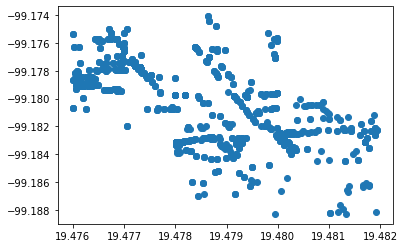

In [12]:
plot()

In [13]:
Ks = [10, 15, 18, 19, 20, 21, 22, 25, 30]

In [16]:
kmeans = KMeans(n_clusters=Ks[5], random_state=0)
y_pred = kmeans.fit_predict(dataset)

In [17]:
y_pred

array([ 2,  2,  2, ..., 13, 13, 13], dtype=int32)

In [19]:
centers = kmeans.cluster_centers_
centers

array([[ 19.4785972 , -99.17667433],
       [ 19.48013258, -99.18253596],
       [ 19.47802676, -99.17991843],
       [ 19.47811863, -99.18312379],
       [ 19.4769335 , -99.1770622 ],
       [ 19.48137995, -99.18716968],
       [ 19.47621733, -99.17880788],
       [ 19.47903655, -99.18594233],
       [ 19.47949425, -99.17984787],
       [ 19.48162156, -99.18248129],
       [ 19.47676572, -99.17584279],
       [ 19.47906685, -99.18419831],
       [ 19.47994842, -99.17650454],
       [ 19.48053081, -99.18086957],
       [ 19.47889731, -99.18294418],
       [ 19.47889921, -99.17830936],
       [ 19.47914678, -99.18147596],
       [ 19.4766096 , -99.17966475],
       [ 19.47712881, -99.17800191],
       [ 19.48062283, -99.18382843],
       [ 19.4789311 , -99.1746474 ]])

In [63]:
d_array = [(0,0)]
c_0 = centers[0]
# order the clusters according to distance from cluster 0 
# In general it might be the closet cluster to the start, 
# but it not sure since the optimizer may handle both cases with the same results.
for idx, c in enumerate(centers[1:]):
    d_array += [(compute_distance(c_0, c), idx + 1)]
cluster_distance = sorted(d_array, key=lambda x: x[0]) 

dict_cluster_to_idx = {c[1] : idx for idx, c in enumerate(cluster_distance)}

idx_res_column = []
# for each row add the relevent number according to the order of the clusters
for pred in y_pred:
    idx_res_column += [dict_cluster_to_idx[pred]]    

In [65]:
# add the column to the dataFrame
df['Index'] = idx_res_column

In [70]:
# craete result new excel
df.to_excel('res_try1.xlsx', sheet_name='results')